# 🎓 AI Bootcamp - Week 6 Day 2
## Support Vector Machines: Visual Demonstrations

### Today's Focus:
- ✅ Visualize linear vs non-linear boundaries
- ✅ Compare different kernels (Linear, RBF, Polynomial)
- ✅ Understand the effect of C and γ parameters
- ✅ See support vectors in action
- ✅ Experiment with decision boundaries

---

**Let's see SVM in action! 🚀**

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
print('✅ Libraries loaded!')

✅ Libraries loaded!


## Part 1: Linear SVM - Simple Case

Let's start with linearly separable data.

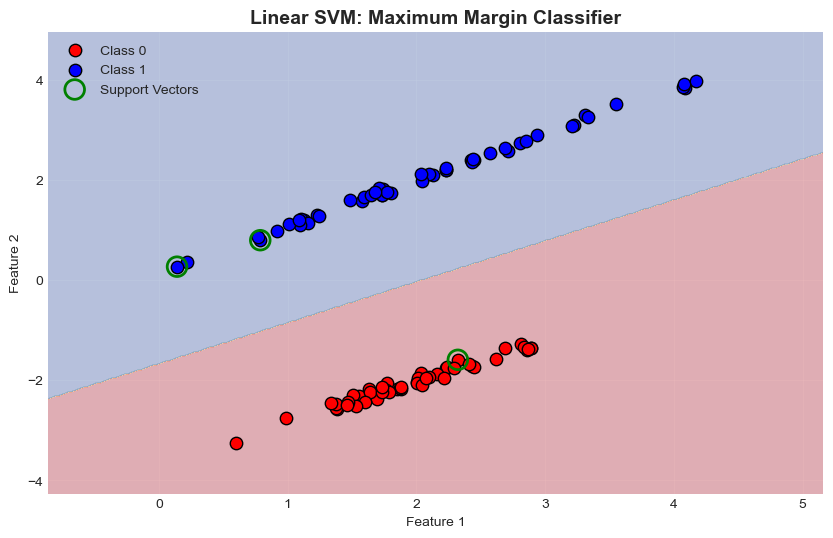

Number of support vectors: 3
Accuracy: 1.000


In [3]:
# Create linearly separable data
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=2.0, random_state=42)

# Train Linear SVM
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X, y)

# Create mesh for decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
plt.scatter(X[y==0, 0], X[y==0, 1], c='red', label='Class 0', edgecolor='k', s=80)
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', label='Class 1', edgecolor='k', s=80)

# Highlight support vectors
plt.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1],
           s=200, facecolors='none', edgecolors='green', linewidth=2,
           label='Support Vectors')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM: Maximum Margin Classifier', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f'Number of support vectors: {len(svm_linear.support_vectors_)}')
print(f'Accuracy: {accuracy_score(y, svm_linear.predict(X)):.3f}')

## Part 2: Non-Linear Data - Why We Need Kernels

Let's see what happens with circular data.

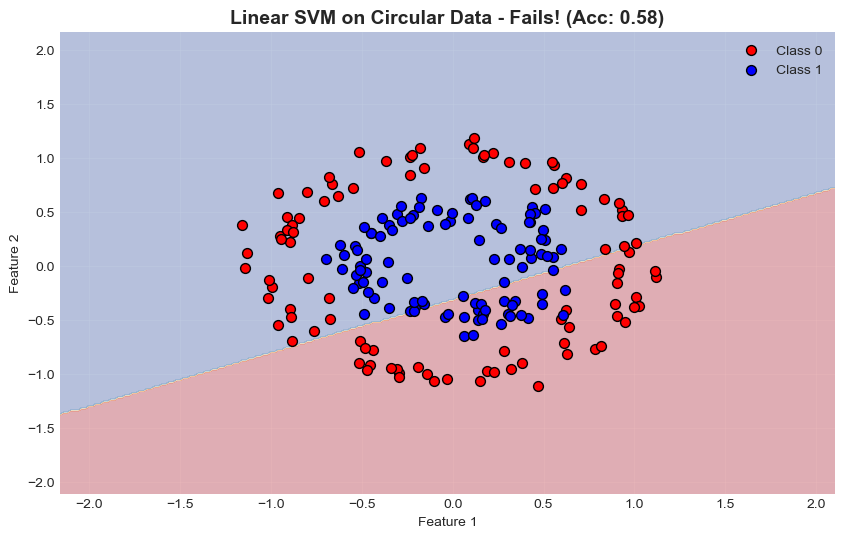

❌ Linear SVM cannot handle circular boundaries!
✅ Solution: Use RBF kernel!


In [4]:
# Create circular data
X_circles, y_circles = datasets.make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)

# Try Linear SVM (will fail)
svm_linear_fail = SVC(kernel='linear', C=1.0)
svm_linear_fail.fit(X_circles, y_circles)

# Create mesh
h = 0.02
x_min, x_max = X_circles[:, 0].min() - 1, X_circles[:, 0].max() + 1
y_min, y_max = X_circles[:, 1].min() - 1, X_circles[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_linear_fail.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
plt.scatter(X_circles[y_circles==0, 0], X_circles[y_circles==0, 1], 
           c='red', label='Class 0', edgecolor='k', s=50)
plt.scatter(X_circles[y_circles==1, 0], X_circles[y_circles==1, 1], 
           c='blue', label='Class 1', edgecolor='k', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Linear SVM on Circular Data - Fails! (Acc: {accuracy_score(y_circles, svm_linear_fail.predict(X_circles)):.2f})',
         fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("❌ Linear SVM cannot handle circular boundaries!")
print("✅ Solution: Use RBF kernel!")

## Part 3: Kernel Comparison - Linear vs RBF vs Polynomial

Compare all three kernels side by side!

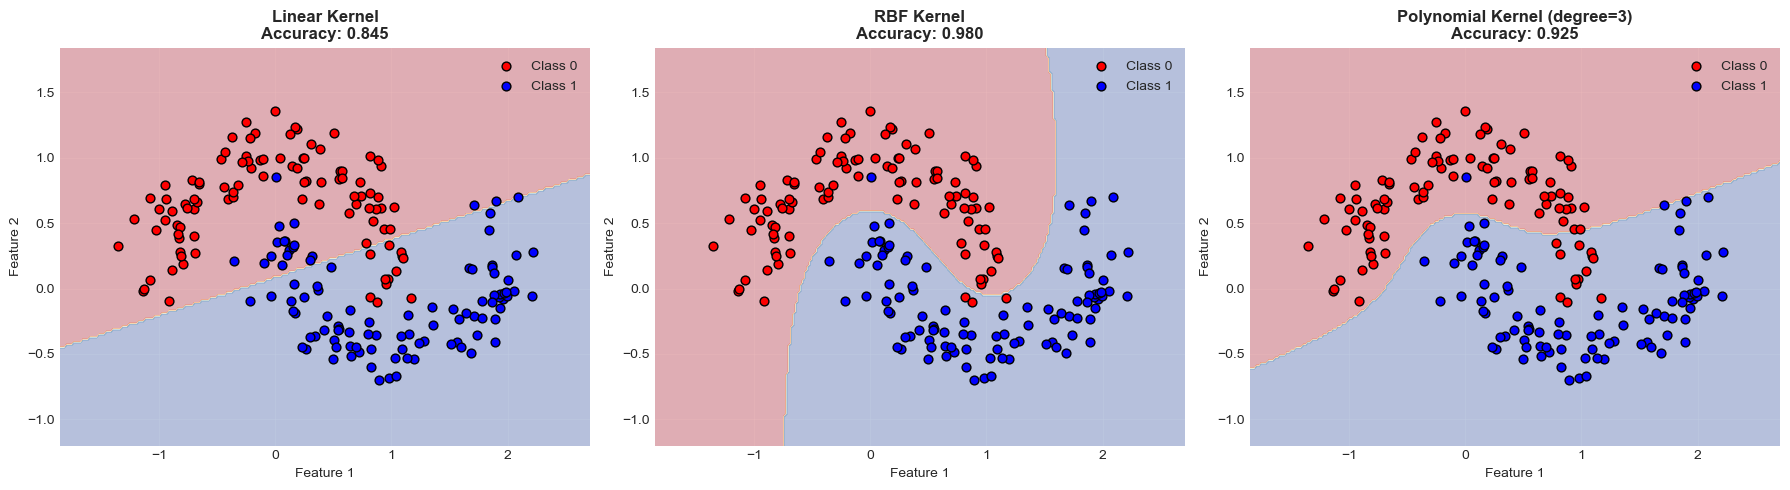

📊 Observations:
   • Linear: Struggles with curved boundaries
   • RBF: Handles curves perfectly!
   • Polynomial: Good for specific curved patterns


In [5]:
# Create moons dataset (curved boundary)
X_moons, y_moons = datasets.make_moons(n_samples=200, noise=0.15, random_state=42)

# Train different kernels
kernels = ['linear', 'rbf', 'poly']
models = {}

for kernel in kernels:
    if kernel == 'poly':
        models[kernel] = SVC(kernel=kernel, degree=3, C=1.0)
    else:
        models[kernel] = SVC(kernel=kernel, C=1.0)
    models[kernel].fit(X_moons, y_moons)

# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ['Linear Kernel', 'RBF Kernel', 'Polynomial Kernel (degree=3)']

for ax, kernel, title in zip(axes, kernels, titles):
    # Create mesh
    h = 0.02
    x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
    y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = models[kernel].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    ax.scatter(X_moons[y_moons==0, 0], X_moons[y_moons==0, 1], 
              c='red', label='Class 0', edgecolor='k', s=40)
    ax.scatter(X_moons[y_moons==1, 0], X_moons[y_moons==1, 1], 
              c='blue', label='Class 1', edgecolor='k', s=40)
    
    acc = accuracy_score(y_moons, models[kernel].predict(X_moons))
    ax.set_title(f'{title}\nAccuracy: {acc:.3f}', fontweight='bold')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Observations:")
print("   • Linear: Struggles with curved boundaries")
print("   • RBF: Handles curves perfectly!")
print("   • Polynomial: Good for specific curved patterns")

## Part 4: Effect of C Parameter

See how C affects the decision boundary!

In [ ]:
# Test different C values
C_values = [0.1, 1, 10, 100]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, C in enumerate(C_values):
    # Train model
    svm = SVC(kernel='rbf', C=C, gamma='auto')
    svm.fit(X_moons, y_moons)
    
    # Create mesh
    h = 0.02
    x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
    y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    axes[idx].scatter(X_moons[y_moons==0, 0], X_moons[y_moons==0, 1], 
                     c='red', edgecolor='k', s=40)
    axes[idx].scatter(X_moons[y_moons==1, 0], X_moons[y_moons==1, 1], 
                     c='blue', edgecolor='k', s=40)
    
    # Highlight support vectors
    axes[idx].scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
                     s=100, facecolors='none', edgecolors='green', linewidth=2)
    
    acc = accuracy_score(y_moons, svm.predict(X_moons))
    axes[idx].set_title(f'C = {C}\nSupport Vectors: {len(svm.support_vectors_)} | Acc: {acc:.3f}',
                       fontweight='bold')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Observations:")
print("   • Small C: More support vectors, smoother boundary (underfitting)")
print("   • Large C: Fewer support vectors, tighter boundary (risk overfitting)")

## Part 5: Effect of Gamma (γ) Parameter

Understand how gamma affects RBF kernel!

In [ ]:
# Test different gamma values
gamma_values = [0.01, 0.1, 1, 10]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, gamma in enumerate(gamma_values):
    # Train model
    svm = SVC(kernel='rbf', C=1.0, gamma=gamma)
    svm.fit(X_moons, y_moons)
    
    # Create mesh
    h = 0.02
    x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
    y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    axes[idx].scatter(X_moons[y_moons==0, 0], X_moons[y_moons==0, 1], 
                     c='red', edgecolor='k', s=40)
    axes[idx].scatter(X_moons[y_moons==1, 0], X_moons[y_moons==1, 1], 
                     c='blue', edgecolor='k', s=40)
    
    acc = accuracy_score(y_moons, svm.predict(X_moons))
    axes[idx].set_title(f'γ = {gamma}\nAccuracy: {acc:.3f}',
                       fontweight='bold')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Observations:")
print("   • Small γ: Smooth, generalized boundary (underfitting)")
print("   • Large γ: Wiggly, tight boundary (overfitting)")
print("   • Sweet spot: Usually around 0.1 to 1")

## Part 6: Real Dataset - Iris Classification

Apply SVM to a real dataset!

In [ ]:
# Load Iris dataset (use 2 features for visualization)
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data[:, :2]  # Use first 2 features
y_iris = (iris.target != 0).astype(int)  # Make it binary: setosa vs others

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM
svm_iris = SVC(kernel='rbf', C=1.0, gamma='auto')
svm_iris.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_iris.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

# Create mesh
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_iris.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(12, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
plt.scatter(X_train_scaled[y_train==0, 0], X_train_scaled[y_train==0, 1],
           c='red', label='Setosa', edgecolor='k', s=80, marker='o')
plt.scatter(X_train_scaled[y_train==1, 0], X_train_scaled[y_train==1, 1],
           c='blue', label='Others', edgecolor='k', s=80, marker='s')

# Support vectors
plt.scatter(svm_iris.support_vectors_[:, 0], svm_iris.support_vectors_[:, 1],
           s=200, facecolors='none', edgecolors='green', linewidth=2,
           label='Support Vectors')

plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title(f'SVM on Iris Dataset (Test Accuracy: {acc:.3f})', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Setosa', 'Others']))
print(f"\n✅ Test Accuracy: {acc:.3f}")
print(f"Number of Support Vectors: {len(svm_iris.support_vectors_)}")

## 📚 Summary

Today you learned:
- ✅ Linear SVM works for linearly separable data
- ✅ Kernels enable non-linear boundaries
- ✅ RBF kernel is most versatile
- ✅ C controls margin vs errors trade-off
- ✅ γ controls influence of single points
- ✅ Support vectors define the boundary

**Key Takeaways:**
- Start with RBF kernel
- Use GridSearchCV to tune C and γ
- Always scale features first
- Visualize decision boundaries
- SVM is powerful for high-dimensional data

**Tomorrow:** Decision Trees & Ensembles! 🌳